In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

/Users/sbokai/miniconda3/envs/chicago-crime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year
0,El izz bahdala,1937
1,#garotas: O Filme,2015
2,"Pruncul, petrolul si Ardelenii",1981
3,Just a Little Harmless Sex,1998
4,Bai hua piao xue hua piao,1977


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

/Users/sbokai/miniconda3/envs/chicago-crime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [65]:
cast = cast[cast.year < 2017]

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [27]:
c = cast
c = c[(c.character == 'Batman') | (c.character == 'Superman')]
c = c.groupby([c.year, c.character]).size().unstack().fillna(0)
c.head()


character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [32]:
print("Superman years: ")
len(c[c.Superman > c.Batman])

Superman years: 


11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [33]:
print("Batman years: ")
len(c[c.Superman < c.Batman])

Batman years: 


27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

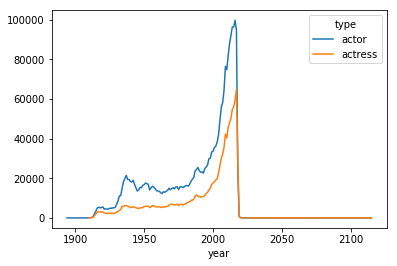

In [39]:
c = cast
c = c.groupby([c.year, c.type]).size()
c.unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

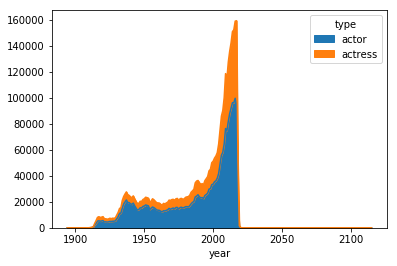

In [41]:
c = cast
c = c.groupby([c.year, c.type]).size()
c.unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

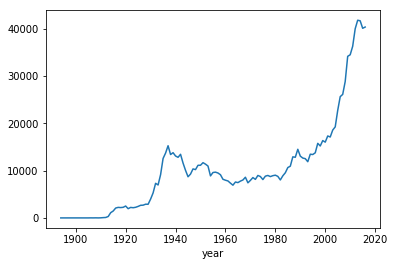

In [66]:
c = cast
c = c.groupby([c.year, c.type]).size()
c = c.unstack().fillna(0)
c = (c.actor - c.actress)
c.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

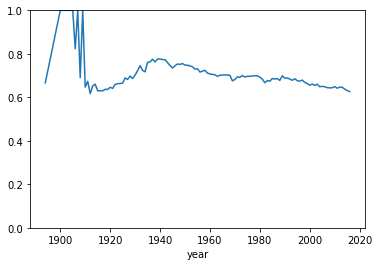

In [69]:
c = cast
c = c.groupby([c.year, c.type]).size()
c = c.unstack().fillna(0)
c = (c.actor / (c.actress + c.actor))
c.plot(ylim=[0, 1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

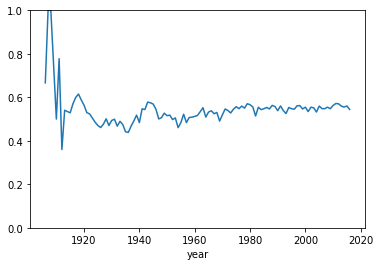

In [71]:
c = cast
c = c[c.n == 2]
c = c.groupby([c.year, c.type]).size()
c = c.unstack().fillna(0)
c = (c.actor / (c.actress + c.actor))
c.plot(ylim=[0, 1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

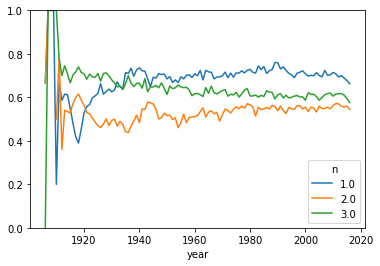

In [94]:
c = cast
c = c[c.n < 4]

c = c.groupby([c.year, c.n, c.type]).size()
c = c.unstack().fillna(0)
c = (c.actor / (c.actress + c.actor))
c = c.unstack()
c.plot(ylim=[0, 1])